In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [4]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
    else:
        print(f"Failed to download: {response.status_code}")

In [5]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [6]:
download(path,"laptop.csv")
file_name = "laptop.csv"

In [7]:
df = pd.read_csv(file_name, header=0)

In [8]:
#Displaying first 5 rows using head method
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [9]:
#Using SLR to Model CPU-FREQUENCY VS Price relation

lm = LinearRegression()
X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat = lm.predict(X)

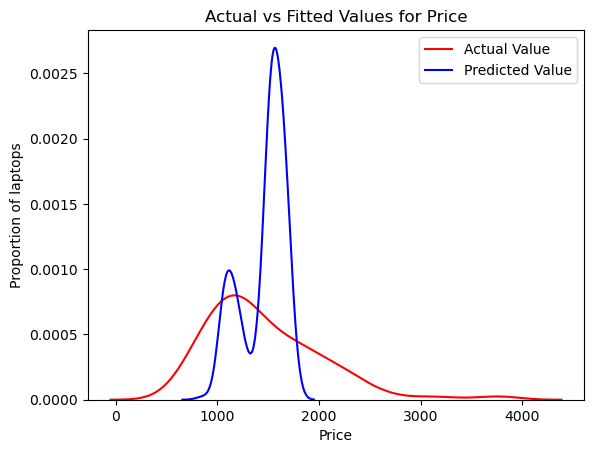

In [10]:
#Visualizing Distributed plot for predicted values and Actual values
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist = False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [11]:
mse_score =mean_squared_error(df['Price'],Yhat)
r2_score = lm.score(X,Y)
print('R-Square for this Regression is:', r2_score)
print('The MSE of price and predicted value is:',mse_score)


R-Square for this Regression is: 0.1344436321024326
The MSE of price and predicted value is: 284583.4405868629


In [12]:
#Multiple linear Regression

#Creating MLR using CPU_frequency, RAM_GB,Storage_GB_SSD,CPU_core,OS,GPU,Category

lm1=LinearRegression()
Z= df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)

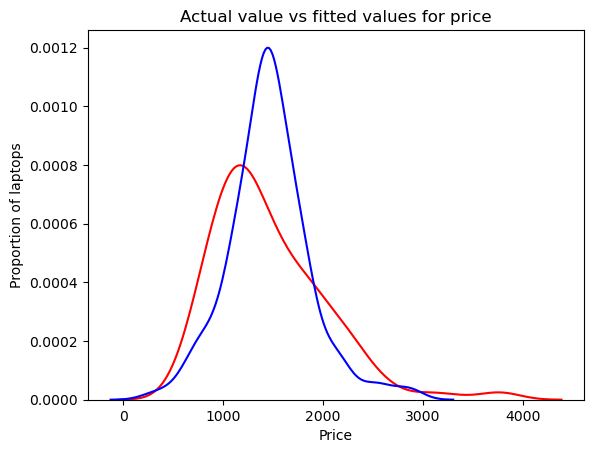

In [13]:
ax1 = sns.kdeplot(df['Price'],color = 'r',label= 'Actual values')
sns.kdeplot(Y_hat, color = 'b', label ='Fitted values', ax=ax1)

plt.title('Actual value vs fitted values for price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.show()

In [14]:
lm.fit(Z,df["Price"])
print('The R-Square is:', lm.score(Z,df['Price']))

The R-Square is: 0.5082509055187374


In [15]:
mean_squared_error(df[['Price']],Y_hat)

161680.5726389311

In [16]:
#Polynomial Regression

X =X.to_numpy().flatten()
f1= np.polyfit(X,Y,1)
p1 =np.poly1d(f1)

f3 = np.polyfit(X,Y,3)
p3 = np.poly1d(f3)

f5= np.polyfit(X,Y,5)
p5=np.poly1d(f5)

In [17]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')


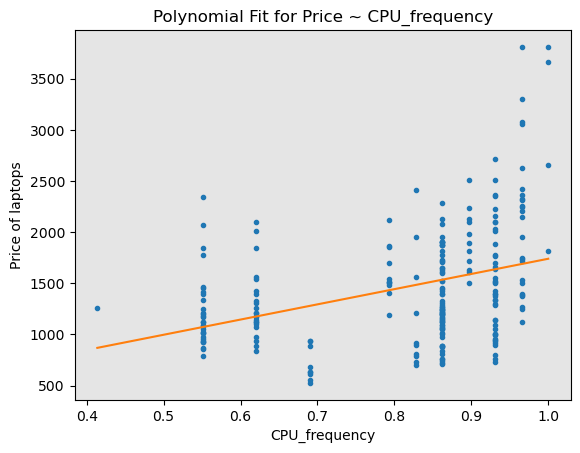

In [18]:
PlotPolly(p1,X,Y,'CPU_frequency')
plt.show()

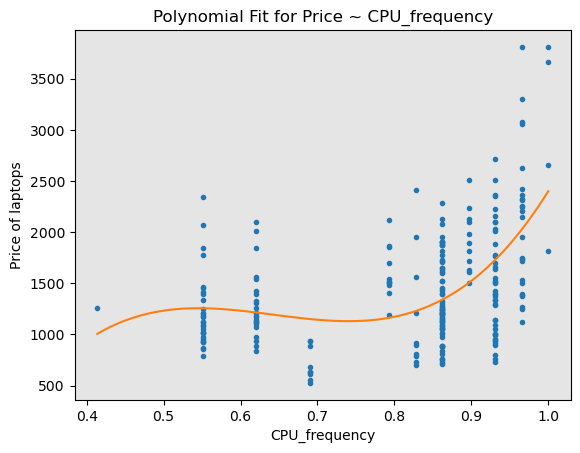

In [19]:
PlotPolly(p3,X,Y,'CPU_frequency')
plt.show()

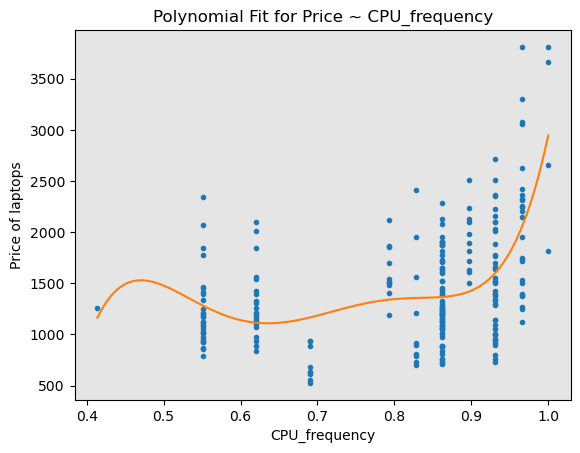

In [20]:
PlotPolly(p5,X,Y,'CPU_frequency')
plt.show()

In [21]:
#Calculating 

from sklearn.metrics import mean_squared_error, r2_score

r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.26692640796531064
The MSE value for 3rd degree polynomial is:  241024.86303848785
The R-square value for 5th degree polynomial is:  0.3030822706442341
The MSE value for 5th degree polynomial is:  229137.29548058633


In [22]:
#Creating Pipeline that perform parameter scaling for all LR model
Input=[('Scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias = False)),('model',LinearRegression())]
pipe = Pipeline(Input)
Z= Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)

In [23]:
#Evaluating MSE and R-SQUARED for this pipeline
print("MSE for multi-variable polynomial pipeline is:", mean_squared_error(Y,ypipe))
print("R-SQUARED for multi-variable polynomial pipeline is:", r2_score(Y,ypipe))

MSE for multi-variable polynomial pipeline is: 120595.8612802837
R-SQUARED for multi-variable polynomial pipeline is: 0.6332094535859659
